#### plaintext

In [1]:
plaintext_file_handle = open('plaintext_file.txt', 'r')

In [2]:
plaintext = plaintext_file_handle.read()

In [3]:
print(plaintext)

Hi, this is a 
temporary file used to implement 
the A-S algorithm. 
Let's see how it goes...

!@#$%^&*()<>:"{}[];',./|\1234567890_+-=~`"

Much evil soon high in hope do view. Out may few northward believing attempted. Yet timed being songs marry one defer men our. Although finished blessing do of. Consider speaking me prospect whatever if. Ten nearer rather hunted six parish indeed number. Allowance repulsive sex may contained can set suspected abilities cordially. Do part am he high rest that. So fruit to ready it being views match. 

On it differed repeated wandered required in. Then girl neat why yet knew rose spot. Moreover property we he kindness greatest be oh striking laughter. In me he at collecting affronting principles apartments. Has visitor law attacks pretend you calling own excited painted. Contented attending smallness it oh ye unwilling. Turned favour man two but lovers. Suffer should if waited common person little oh. Improved civility graceful sex few smallest screen

In [38]:
for char in plaintext:
    print(char, end='')

Hi, this is a 
temporary file used to implement 
the A-S algorithm. 
Let's see how it goes...

!@#$%^&*()<>:"{}[];',./|\1234567890_+-=~`"

Much evil soon high in hope do view. Out may few northward believing attempted. Yet timed being songs marry one defer men our. Although finished blessing do of. Consider speaking me prospect whatever if. Ten nearer rather hunted six parish indeed number. Allowance repulsive sex may contained can set suspected abilities cordially. Do part am he high rest that. So fruit to ready it being views match. 

On it differed repeated wandered required in. Then girl neat why yet knew rose spot. Moreover property we he kindness greatest be oh striking laughter. In me he at collecting affronting principles apartments. Has visitor law attacks pretend you calling own excited painted. Contented attending smallness it oh ye unwilling. Turned favour man two but lovers. Suffer should if waited common person little oh. Improved civility graceful sex few smallest screen

#### key

In [39]:
key_file_handle = open('key_file.txt', 'r')

In [40]:
key = key_file_handle.read()

In [41]:
print(key)

M:~kZr$L0t+[}v#mpXaE+\kJYI-1br!ErgOu]{N_"3y?a9am?5rrN~UBd4_bdL%Qfp<VF9l8)rA}^m8bV7gF/W>(,<K0G2I-Z@&`sYb@llUzDAx!#TgP2gBP#><vxtmN% G*Qbb{v.h]0G}%?s/Ah_Zyxk3?:=yH!H"#8!L;~r}%au\m2_iPE<SeCsrMu9Mf2Dl\bJ,U!/6*ddq|*#9EKUF/h4')T\=$hrnuYbj/7O0|4qC!3f$bc.`y<&<|X]:5%n/0mqZ_t|@sVRc7?R&qLZMZaKx[[i'BD6T.ty^\XWF;cz#.3ers>h]\Dn?*"H#Rw|Pf EH.t_sTuz'u4-utt90^il%]&~<9|1A>kiF-A|9w'!4?G9[!wg;}*[h5").BUR\;}p4h-W9I`PZ417OMN?[/&IauBf)9ot Rj?s5F^~)oVBGtNO?,rVkV@)["i,ENg|SG2`lsq@G{Vv`~SlB^0$iqveFCl!N|k_fZ %FbAp2~mD2hFXIZGCn9i<5pq?C^0lM*}a+6s`QD%}>%lj1kT$v<uE*L~Sv#p}S)FD]Y>7ANXb|z|25qm5,aT<S{.r])&?e25:!q`y+\2\:DU DN*{6"y9;w~Ww?d"IE[@to=i#R3eexa';0?6#>Cm!HX$~4A?tVxhb%=s6GTdz~q{U3J9Aq^0.=i#U!-@n;M9Xyu+vj&-ahApK8D)#QgS'Js-[#wn@YuyY-D.=\`i,:Qhv+a$Y>(}a|M\Kk9INb7@$!;p?UZweq!D+\r@hi*vscy,%FM(kmxi"n{s`P9A"/e{^(6/D3kz5jTEX x&5_kO`CN}Hfue=J&@eN*fHiRoaiol[cbo\&o0l`|RZI"CwEX8vKi+"%T16%~v~ZQ;iX Z6By3LxI_sykmRo'~AD#zlKyo3.^So4ARBWlhz11"}+J3ywH^=:n9R?Jo,|1$HJhw,U*J7c0,gR0 &Sr:J2!7gOza_'<Va.%\`4Cwa[\bi3_rVK>=& u#J[PZuMkM(4X\q

#### XORing 

In [42]:
# reset file handlers to beginning of file:
plaintext_file_handle.seek(0,0)
key_file_handle.seek(0,0)

0

In [43]:
def encode_decode(from_file_path, key_path, to_file_path):
    from_file_handle = open(from_file_path, 'r', encoding='utf8')
    key_file_handle = open(key_path, 'r', encoding='utf8')
    to_file_handle = open(to_file_path, 'w', encoding='utf8') # opened in write mode to delete any old data dump

    from_file_handle.seek(0,0)
    key_file_handle.seek(0,0)
    i = 0
    while True:
        p_i = from_file_handle.read(1)
        if p_i == '':
            # end of ciphertext_file reached, en/de-ciphering over
            break

        k_i = key_file_handle.read(1)
        if k_i == '':
            # end of key reached, reset to beginning 
            key_file_handle.seek(0,0)
            k_i = key_file_handle.read(1)

        int_p_i = ord(p_i)
        int_k_i = ord(k_i)
        if int_p_i == 128:
            # corresponds to ASCII 13 -> \r
            # acts as delimiter for ciphertext with \r, so replace back with 13 to get correct plaintext
            int_p_i = 13
        int_p_i_XOR_k_i = (int_k_i ^ int_p_i) % 128
        if int_p_i_XOR_k_i == 13:
            p_i_XOR_k_i = chr(128) 
            # ASCII 13 -> \r
            # need to handle it separately, replacing it with ASCII 128 (invalid for our range)
        else:
            p_i_XOR_k_i = chr(int_p_i_XOR_k_i)

        i += 1
        print('{}.\t{} ({})\t^\t{} ({})\t->\t{} ({})'.format(i, p_i , int_p_i, k_i ,int_k_i, p_i_XOR_k_i, int_p_i_XOR_k_i))

        # write to ciphertext_file
        to_file_handle.write(p_i_XOR_k_i)

    # close files
    from_file_handle.close()
    key_file_handle.close()
    to_file_handle.close()

In [44]:
# encode stage
# dumps data in 'ciphertext_file.txt'
encode_decode('plaintext_file.txt', 'key_file.txt', 'plain_to_cipher.txt')

1.	H (72)	^	M (77)	->	 (5)
2.	i (105)	^	: (58)	->	S (83)
3.	, (44)	^	~ (126)	->	R (82)
4.	  (32)	^	k (107)	->	K (75)
5.	t (116)	^	Z (90)	->	. (46)
6.	h (104)	^	r (114)	->	 (26)
7.	i (105)	^	$ (36)	->	M (77)
8.	s (115)	^	L (76)	->	? (63)
9.	  (32)	^	0 (48)	->	 (16)
10.	i (105)	^	t (116)	->	 (29)
11.	s (115)	^	+ (43)	->	X (88)
12.	  (32)	^	[ (91)	->	{ (123)
13.	a (97)	^	} (125)	->	 (28)
14.	  (32)	^	v (118)	->	V (86)
15.	
 (10)	^	# (35)	->	) (41)
16.	t (116)	^	m (109)	->	 (25)
17.	e (101)	^	p (112)	->	 (21)
18.	m (109)	^	X (88)	->	5 (53)
19.	p (112)	^	a (97)	->	 (17)
20.	o (111)	^	E (69)	->	* (42)
21.	r (114)	^	+ (43)	->	Y (89)
22.	a (97)	^	\ (92)	->	= (61)
23.	r (114)	^	k (107)	->	 (25)
24.	y (121)	^	J (74)	->	3 (51)
25.	  (32)	^	Y (89)	->	y (121)
26.	f (102)	^	I (73)	->	/ (47)
27.	i (105)	^	- (45)	->	D (68)
28.	l (108)	^	1 (49)	->	] (93)
29.	e (101)	^	b (98)	->	 (7)
30.	  (32)	^	r (114)	->	R (82)
31.	u (117)	^	! (33)	->	T (84)
32.	s (115)	^	E (69)	->	6 (54)
33.	e (101)	^	r (1

In [45]:
# decode stage
# dumps data in 'cipher_back_to_plain.txt'
encode_decode('plain_to_cipher.txt', 'key_file.txt', 'cipher_back_to_plain.txt')

1.	 (5)	^	M (77)	->	H (72)
2.	S (83)	^	: (58)	->	i (105)
3.	R (82)	^	~ (126)	->	, (44)
4.	K (75)	^	k (107)	->	  (32)
5.	. (46)	^	Z (90)	->	t (116)
6.	 (26)	^	r (114)	->	h (104)
7.	M (77)	^	$ (36)	->	i (105)
8.	? (63)	^	L (76)	->	s (115)
9.	 (16)	^	0 (48)	->	  (32)
10.	 (29)	^	t (116)	->	i (105)
11.	X (88)	^	+ (43)	->	s (115)
12.	{ (123)	^	[ (91)	->	  (32)
13.	 (28)	^	} (125)	->	a (97)
14.	V (86)	^	v (118)	->	  (32)
15.	) (41)	^	# (35)	->	
 (10)
16.	 (25)	^	m (109)	->	t (116)
17.	 (21)	^	p (112)	->	e (101)
18.	5 (53)	^	X (88)	->	m (109)
19.	 (17)	^	a (97)	->	p (112)
20.	* (42)	^	E (69)	->	o (111)
21.	Y (89)	^	+ (43)	->	r (114)
22.	= (61)	^	\ (92)	->	a (97)
23.	 (25)	^	k (107)	->	r (114)
24.	3 (51)	^	J (74)	->	y (121)
25.	y (121)	^	Y (89)	->	  (32)
26.	/ (47)	^	I (73)	->	f (102)
27.	D (68)	^	- (45)	->	i (105)
28.	] (93)	^	1 (49)	->	l (108)
29.	 (7)	^	b (98)	->	e (101)
30.	R (82)	^	r (114)	->	  (32)
31.	T (84)	^	! (33)	->	u (117)
32.	6 (54)	^	E (69)	->	s (115)
33.	 (23)	^	r (11

#### Image data

In [7]:
# encrypting image (R, G, B separately) with our key_file.txt

In [12]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 6.1.0


In [11]:
from PIL import Image

In [22]:
def encrypt_decrypt_image(from_image_path, key_path, to_image_path):
    img = Image.open(from_image_path)
    
    new_img = Image.new('RGB', img.size, (0,0,0))
    # create new RGB mode 3-band all-black image
    new_img_loaded = new_img.load()
    
    key_file_handle = open(key_path, 'r', encoding='utf8')
    key_file_handle.seek(0, 0)
    
    for r in range(img.size[0]):
        for c in range(img.size[1]):
            rgb = img.getpixel((r, c))
            
            rgb_ = list(rgb)
            for pixel_band in range(len(rgb)):
                k_i = key_file_handle.read(1)
                if k_i == '':
                    # end of key reached, reset to beginning 
                    key_file_handle.seek(0,0)
                    k_i = key_file_handle.read(1)

                int_k_i = ord(k_i)
                rgb_[pixel_band] = (int(rgb[pixel_band]^int_k_i)%256)
                
            new_img_loaded[r, c] = tuple(rgb_)
#     for c in range(img.size[1]):
#         for r in range(img.size[0]):
#             rgb = img.getpixel((r, c))
            
#             rgb_ = list(rgb)
#             for pixel_band in range(len(rgb)):
#                 k_i = key_file_handle.read(1)
#                 if k_i == '':
#                     # end of key reached, reset to beginning 
#                     key_file_handle.seek(0,0)
#                     k_i = key_file_handle.read(1)

#                 int_k_i = ord(k_i)
#                 rgb_[pixel_band] = (int(rgb[pixel_band]^int_k_i)%256)
                
#             new_img_loaded[r, c] = tuple(rgb_)
    
    new_img_loaded = extra_layer(new_img, new_img_loaded)

    new_img.save(to_image_path, 'PNG')

In [24]:
def extra_layer(new_img, new_img_loaded):
    i = 1
    for r in range(new_img.size[0]):
        for c in range(new_img.size[1]):
            rgb = new_img.getpixel((r, c))
            
            rgb_ = list(rgb)
            for pixel_band in range(len(rgb)):
                rgb_[pixel_band] = (int(rgb[pixel_band]^i)%256)
                
            new_img_loaded[r, c] = tuple(rgb_)
            i+=1
    return new_img_loaded

In [30]:
encrypt_decrypt_image('Sydney-Opera-House.jpg', 'key_file.txt', 'encrypted.png')

In [5]:
from matplotlib import pyplot as plt

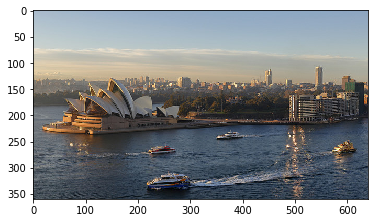

In [31]:
original_img = plt.imread('Sydney-Opera-House.jpg')
plt.imshow(original_img)

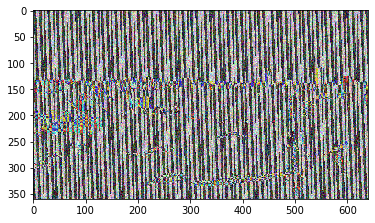

In [32]:
encrypted_img = plt.imread('encrypted.png')
plt.imshow(encrypted_img)

In [33]:
encrypt_decrypt_image('encrypted.png', 'key_file.txt', 'decrypted.png')

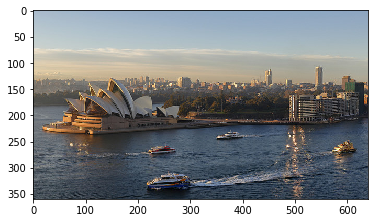

In [34]:
decrypted_img = plt.imread('decrypted.png')
plt.imshow(decrypted_img)

#### encrypting data file with image - 3 channels acting as 3 essential parts of our key

In [29]:
def encode_decode_data_with_image(from_file_path, key_image_path, to_file_path):
    from_file_handle = open(from_file_path, 'r', encoding='utf8')
    key_img = Image.open(key_image_path)
    to_file_handle = open(to_file_path, 'w', encoding='utf8') # opened in write mode to delete any old data dump

    from_file_handle.seek(0,0)
    i = 0
    process_complete = False
    while not process_complete:
        for r in range(key_img.size[0]):
            if process_complete:
                break
                
            for c in range((key_img.size[1])):
                rgb = key_img.getpixel((r, c))
                p_i = from_file_handle.read(1)
                if p_i is '':
                    process_complete = True
                    break
                    
                int_p_i = ord(p_i)
                if int_p_i == 128:
                    # corresponds to ASCII 13 -> \r
                    # acts as delimiter for ciphertext with \r, so replace back with 13 to get correct plaintext
                    int_p_i = 13
                int_p_i_XOR_k_i = (int_p_i^(rgb[0]^rgb[1]^rgb[2])) % 128
                if int_p_i_XOR_k_i == 13:
                    p_i_XOR_k_i = chr(128)
                else:
                    p_i_XOR_k_i = chr(int_p_i_XOR_k_i)
                
                i+=1
                print('{}.\t{} ({})\t^\t ({})\t->\t{} ({})'.format(i, p_i , int_p_i, rgb, p_i_XOR_k_i, int_p_i_XOR_k_i))
                
                # write to ciphertext_file
                to_file_handle.write(p_i_XOR_k_i)

    # close files
    from_file_handle.close()
    to_file_handle.close()

In [30]:
# encode stage
# dumps data in 'plain_to_cipher_using_img_key.txt'
encode_decode_data_with_image('plaintext_file.txt', 'Sydney-Opera-House.jpg', 'plain_to_cipher_using_img_key.txt')

1.	H (72)	^	 ((170, 187, 203))	->	 (18)
2.	i (105)	^	 ((170, 187, 203))	->	3 (51)
3.	, (44)	^	 ((170, 187, 203))	->	v (118)
4.	  (32)	^	 ((171, 188, 204))	->	{ (123)
5.	t (116)	^	 ((171, 188, 204))	->	/ (47)
6.	h (104)	^	 ((172, 189, 205))	->	4 (52)
7.	i (105)	^	 ((172, 189, 205))	->	5 (53)
8.	s (115)	^	 ((172, 189, 205))	->	/ (47)
9.	  (32)	^	 ((173, 190, 206))	->	} (125)
10.	i (105)	^	 ((173, 190, 206))	->	4 (52)
11.	s (115)	^	 ((174, 191, 207))	->	- (45)
12.	  (32)	^	 ((174, 191, 207))	->	~ (126)
13.	a (97)	^	 ((174, 192, 206))	->	A (65)
14.	  (32)	^	 ((174, 192, 206))	->	  (0)
15.	
 (10)	^	 ((175, 193, 207))	->	+ (43)
16.	t (116)	^	 ((175, 193, 207))	->	U (85)
17.	e (101)	^	 ((175, 193, 205))	->	F (70)
18.	m (109)	^	 ((175, 193, 205))	->	N (78)
19.	p (112)	^	 ((176, 194, 206))	->	L (76)
20.	o (111)	^	 ((177, 194, 204))	->	P (80)
21.	r (114)	^	 ((177, 194, 204))	->	M (77)
22.	a (97)	^	 ((178, 195, 205))	->	] (93)
23.	r (114)	^	 ((178, 195, 205))	->	N (78)
24.	y (121)	^	 ((178, 195,

In [31]:
# decode stage
# dumps data in 'cipher_back_to_plain_using_img_key.txt'
encode_decode_data_with_image('plain_to_cipher_using_img_key.txt', 'Sydney-Opera-House.jpg', 'cipher_back_to_plain_using_img_key.txt')

1.	 (18)	^	 ((170, 187, 203))	->	H (72)
2.	3 (51)	^	 ((170, 187, 203))	->	i (105)
3.	v (118)	^	 ((170, 187, 203))	->	, (44)
4.	{ (123)	^	 ((171, 188, 204))	->	  (32)
5.	/ (47)	^	 ((171, 188, 204))	->	t (116)
6.	4 (52)	^	 ((172, 189, 205))	->	h (104)
7.	5 (53)	^	 ((172, 189, 205))	->	i (105)
8.	/ (47)	^	 ((172, 189, 205))	->	s (115)
9.	} (125)	^	 ((173, 190, 206))	->	  (32)
10.	4 (52)	^	 ((173, 190, 206))	->	i (105)
11.	- (45)	^	 ((174, 191, 207))	->	s (115)
12.	~ (126)	^	 ((174, 191, 207))	->	  (32)
13.	A (65)	^	 ((174, 192, 206))	->	a (97)
14.	  (0)	^	 ((174, 192, 206))	->	  (32)
15.	+ (43)	^	 ((175, 193, 207))	->	
 (10)
16.	U (85)	^	 ((175, 193, 207))	->	t (116)
17.	F (70)	^	 ((175, 193, 205))	->	e (101)
18.	N (78)	^	 ((175, 193, 205))	->	m (109)
19.	L (76)	^	 ((176, 194, 206))	->	p (112)
20.	P (80)	^	 ((177, 194, 204))	->	o (111)
21.	M (77)	^	 ((177, 194, 204))	->	r (114)
22.	] (93)	^	 ((178, 195, 205))	->	a (97)
23.	N (78)	^	 ((178, 195, 205))	->	r (114)
24.	E (69)	^	 ((178, 195, 